# Add Global Subset Grids


## Step 1.1: Horizontal Grid

Extract a subgrid from a global grid using the `subgrid_from_supergrid` method:

In [ ]:
from CrocoDash.grid import Grid

grid = Grid.subgrid_from_supergrid(
    path = "s3://crocodile-cesm/CrocoDash/data/grids/ocean_hgrid_trimmed.nc",  # supergrid
    llc = (16.0, 192.0),  # (l)ower (l)eft (c)orner coords
    urc = (27.0, 209.0),  # (u)pper (r)ight (c)orner coords
    name = "hawaii_2"
)

## Step 1.2: Topography

In [2]:
from CrocoDash.topo import Topo

topo = Topo(
    grid = grid,
    min_depth = 9.5,
)

In [ ]:
bathymetry_path='s3://crocodile-cesm/CrocoDash/data/gebco/GEBCO_2024.zarr/'

topo.interpolate_from_file(
    file_path = bathymetry_path,
    longitude_coordinate_name="lon",
    latitude_coordinate_name="lat",
    vertical_coordinate_name="elevation"
)

Begin regridding bathymetry...

Original bathymetry size: 6.26 Mb
Regridded size: 0.70 Mb
Automatic regridding may fail if your domain is too big! If this process hangs or crashes,open a terminal with appropriate computational and resources try calling ESMF directly in the input directory None via

`mpirun -np NUMBER_OF_CPUS ESMF_Regrid -s bathymetry_original.nc -d bathymetry_unfinished.nc -m bilinear --src_var depth --dst_var depth --netcdf4 --src_regional --dst_regional`

For details see https://xesmf.readthedocs.io/en/latest/large_problems_on_HPC.html

Afterwards, run the 'expt.tidy_bathymetry' method to skip the expensive interpolation step, and finishing metadata, encoding and cleanup.



Regridding successful! Now calling `tidy_bathymetry` method for some finishing touches...
Tidy bathymetry: Reading in regridded bathymetry to fix up metadata...done. Filling in inland lakes and channels... done.
setup bathymetry has finished successfully.


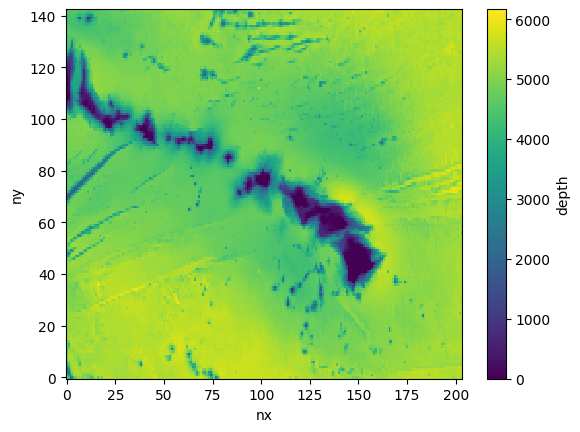

In [4]:
topo.depth.plot()